In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
sns.set_palette("muted")
from warnings import filterwarnings
filterwarnings("ignore")

# Modeling

In [27]:
df1 = pd.read_excel('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")

<b>EDA

In [28]:
df1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [29]:
df1.drop("Unnamed: 0", axis=1,inplace=True)

In [30]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


<b> Data Dictionary 
    
    1. vote: Party choice: Conservative or Labour

    2. age: in years

    3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

    4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

    5. Blair: Assessment of the Labour leader, 1 to 5.

    6. Hague: Assessment of the Conservative leader, 1 to 5.

    7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent          ‘Eurosceptic’ sentiment.

    8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

    9. gender: female or male.


In [31]:
round(df1.describe(),2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00
mean,54.18,3.25,3.14,3.33,2.75,6.73,1.54
std,15.71,0.88,0.93,1.17,1.23,3.30,1.08
min,24.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,41.00,3.00,3.00,2.00,2.00,4.00,0.00
50%,53.00,3.00,3.00,4.00,2.00,6.00,2.00
75%,67.00,4.00,4.00,4.00,4.00,10.00,2.00
max,93.00,5.00,5.00,5.00,5.00,11.00,3.00


In [32]:
df1.shape

(1525, 9)

In [33]:
df1.duplicated().sum()

8

In [34]:
df1[df1.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [35]:
df1.drop_duplicates(inplace=True)

In [36]:
df1.duplicated().sum()

0

In [37]:
df1.shape

(1517, 9)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [13]:
df1.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [40]:
round(df1.describe(),2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00
mean,54.24,3.25,3.14,3.34,2.75,6.74,1.54
std,15.70,0.88,0.93,1.17,1.23,3.30,1.08
min,24.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,41.00,3.00,3.00,2.00,2.00,4.00,0.00
50%,53.00,3.00,3.00,4.00,2.00,6.00,2.00
75%,67.00,4.00,4.00,4.00,4.00,10.00,2.00
max,93.00,5.00,5.00,5.00,5.00,11.00,3.00


In [41]:
df1conti = df1[['age']]

In [42]:
df1conti.head()

,age
0,43
1,36
2,35
3,24
4,41


In [43]:
df1cate = df1[['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge',"gender"]]

In [44]:
b = np.arange(0,8)
df1cate_columns = df1cate.columns

<b> Univariate & Bivariate

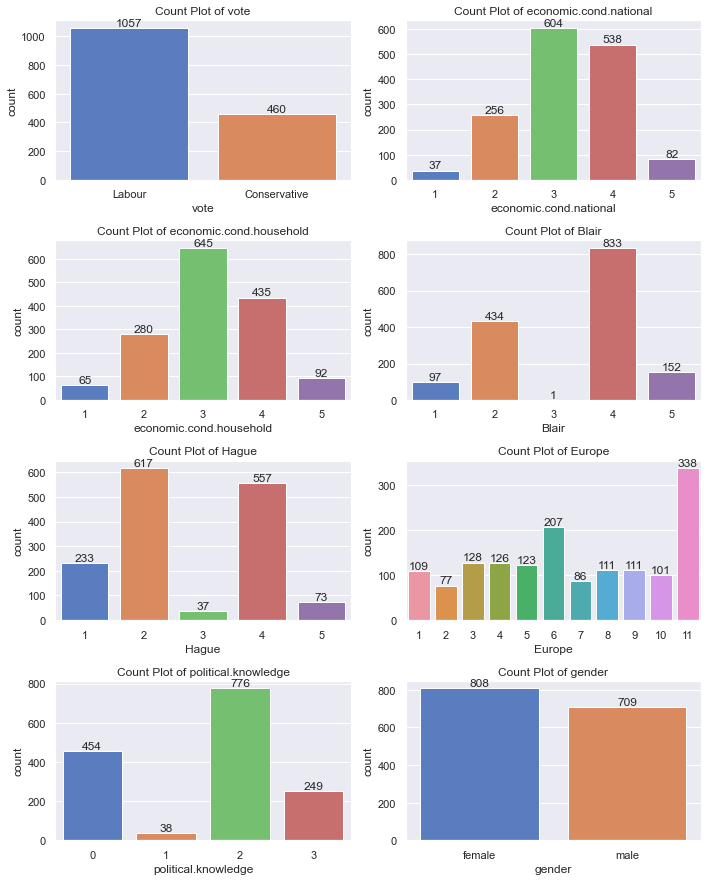

In [19]:
plt.figure(figsize=(10,15))
for i in b:
    plt.subplot(5,2,i+1);
    bar_graph = sns.countplot(df1cate[df1cate_columns[i]]);
    bar_graph.bar_label(bar_graph.containers[0])
    plt.title("Count Plot of {}".format(df1cate_columns[i]))
    plt.tight_layout();

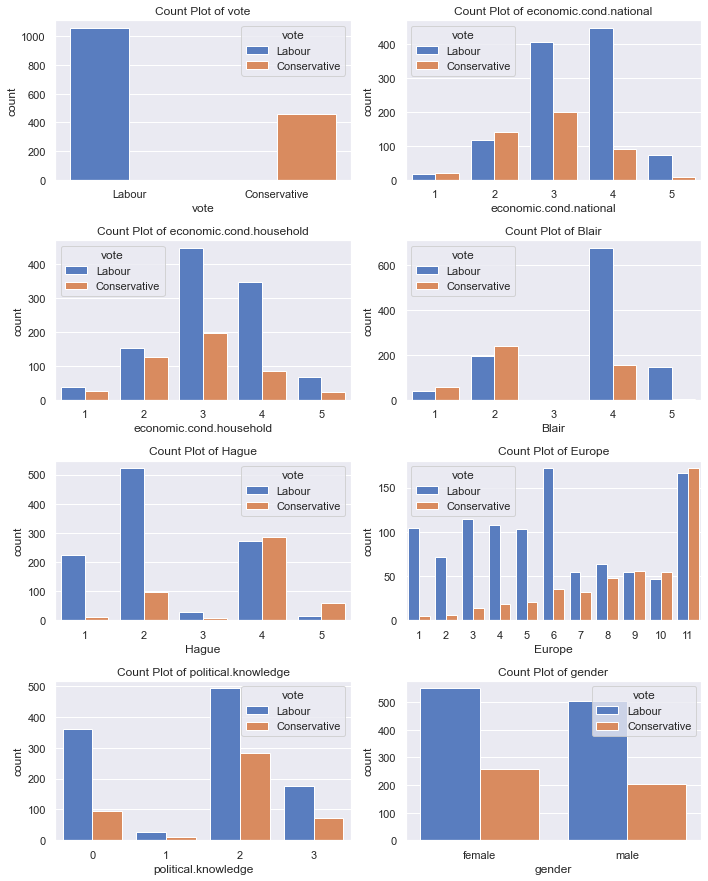

In [20]:
plt.figure(figsize=(10,15))
for i in b:
    plt.subplot(5,2,i+1);
    sns.countplot(df1cate[df1cate_columns[i]], hue=df1cate["vote"]);
    plt.title("Count Plot of {}".format(df1cate_columns[i]))
    plt.tight_layout();

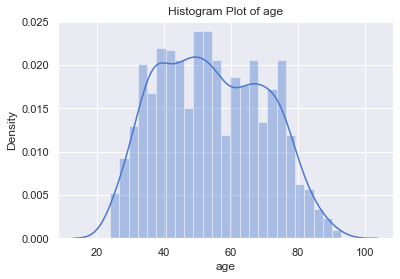

In [21]:
sns.distplot(df1conti['age'],kde=True,bins=25);
plt.title("Histogram Plot of {}".format(df1conti.columns[0]));  
   

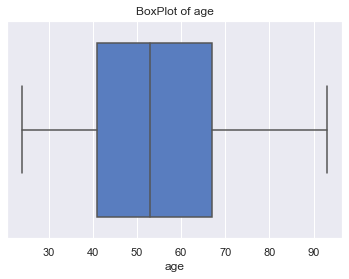

In [22]:
sns.boxplot(df1conti['age']);
plt.title("BoxPlot of {}".format(df1conti.columns[0]));

In [23]:

print("skewness of {} is".format(df1conti.columns[0]),df1conti['age'].skew())

print("Kurtosis of {} is".format(df1conti.columns[0]),df1conti['age'].kurtosis())

skewness of age is 0.13979987012068112
Kurtosis of age is -0.943707667905203


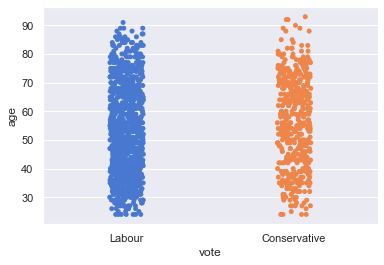

In [24]:
sns.stripplot(y=df1["age"],x=df1["vote"], jitter=True);

In [25]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


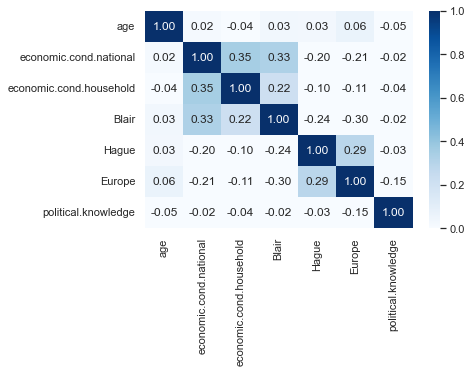

In [26]:
sns.heatmap(df1.corr(),annot=True, fmt='.2f', cmap='Blues',vmin=0,vmax=1)
plt.show()

<Figure size 720x1080 with 0 Axes>

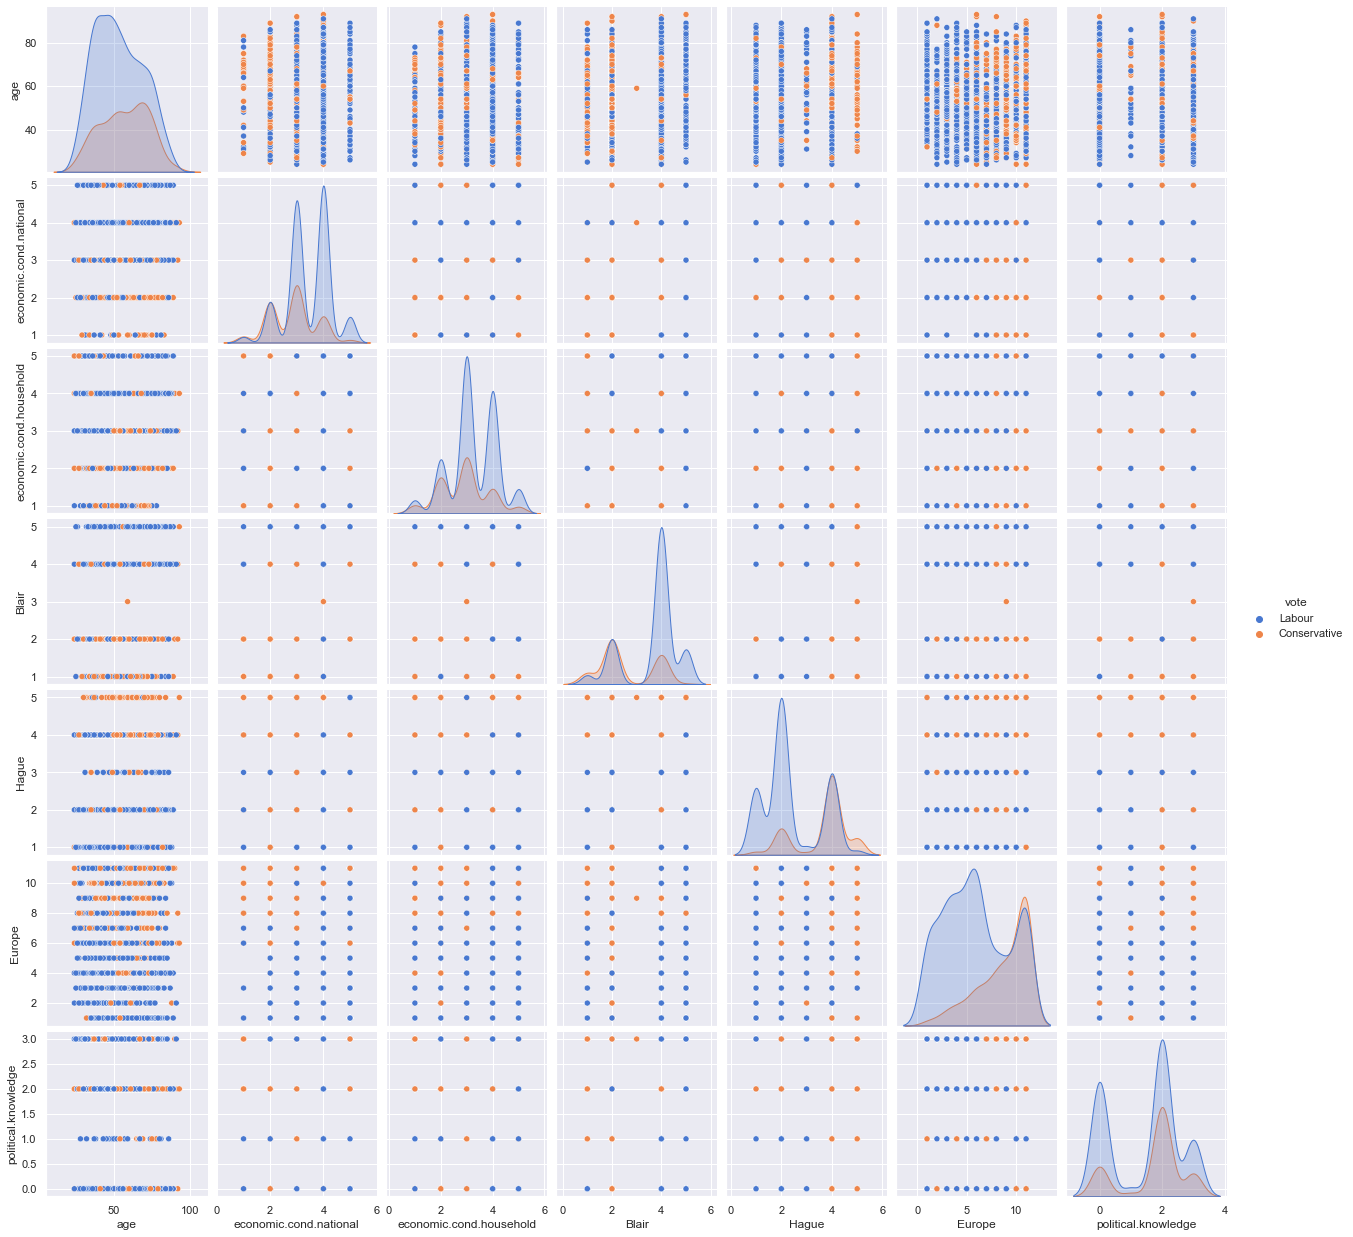

In [27]:
plt.figure(figsize=(10,15));
sns.pairplot(df1,diag_kind='kde',hue="vote");

In [28]:
outlier_check = df1[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]

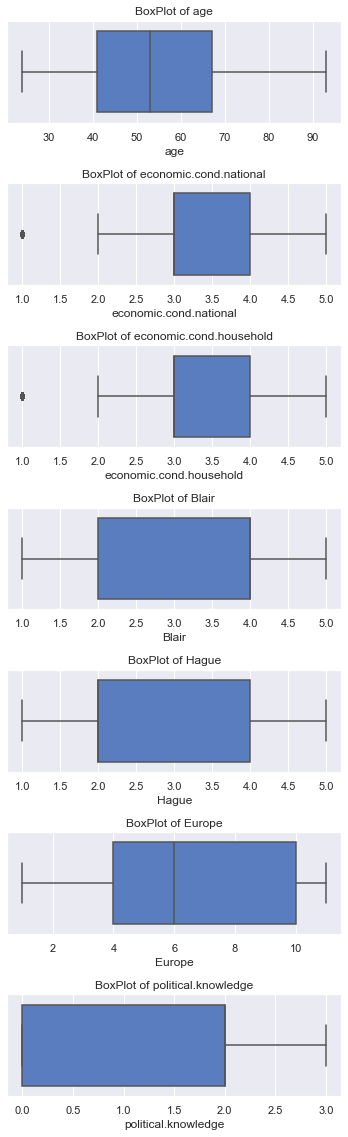

In [29]:
a=np.arange(0,7)
plt.figure(figsize=(5,20))
outlier_check_columns=outlier_check.columns
for i in a:
    plt.subplot(9,1,i+1);
    sns.boxplot(outlier_check[outlier_check_columns[i]]);
    plt.title("BoxPlot of {}".format(outlier_check_columns[i]))
    plt.tight_layout();
    

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 150.8+ KB


In [45]:
print(df1cate.columns)
dummy_cat = ['gender']
print(dummy_cat)

Index(['vote', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')
['gender']


In [46]:
df1 =pd.get_dummies(df1, columns=dummy_cat,drop_first=True)

In [47]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


In [48]:
num1=['age'] 

df1[num1] = df1[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [49]:
round(df1.describe(),2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00
mean,0.44,3.25,3.14,3.34,2.75,6.74,1.54,0.47
std,0.23,0.88,0.93,1.17,1.23,3.30,1.08,0.50
min,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,0.25,3.00,3.00,2.00,2.00,4.00,0.00,0.00
50%,0.42,3.00,3.00,4.00,2.00,6.00,2.00,0.00
75%,0.62,4.00,4.00,4.00,4.00,10.00,2.00,1.00
max,1.00,5.00,5.00,5.00,5.00,11.00,3.00,1.00


In [50]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,0.275362,3,3,4,1,2,2,0
1,Labour,0.173913,4,4,4,4,5,2,1
2,Labour,0.159420,4,4,5,2,3,2,1
3,Labour,0.000000,4,2,2,1,4,0,0
4,Labour,0.246377,2,2,1,1,6,2,1


In [51]:
df1[['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']] = df1[['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].astype('category')

In [52]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1['vote'] = LE.fit_transform(df1['vote'])

In [53]:
df1["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   int32   
 1   age                      1517 non-null   float64 
 2   economic.cond.national   1517 non-null   category
 3   economic.cond.household  1517 non-null   category
 4   Blair                    1517 non-null   category
 5   Hague                    1517 non-null   category
 6   Europe                   1517 non-null   category
 7   political.knowledge      1517 non-null   category
 8   gender_male              1517 non-null   uint8   
dtypes: category(6), float64(1), int32(1), uint8(1)
memory usage: 41.4 KB


In [55]:
# Copy all the predictor variables into X dataframe
X = df1.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df1['vote']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

<b>Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   30.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [63]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [64]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593


In [65]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8312912346842601

In [66]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8355263157894737

AUC: 0.8900


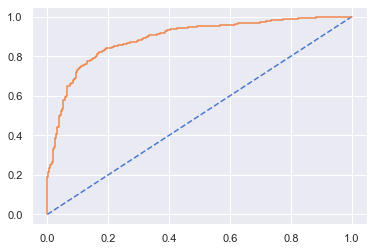

In [67]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.8826


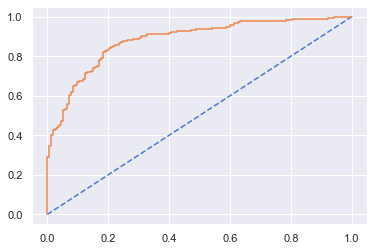

In [68]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

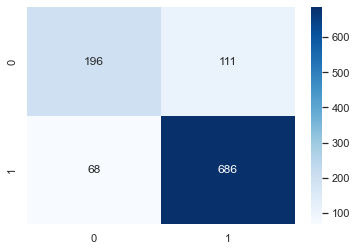

In [50]:
cm = confusion_matrix(y_train, ytrain_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

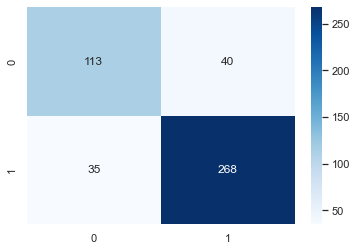

In [51]:
cm = confusion_matrix(y_test, ytest_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [52]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [53]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



<b> Logistic Regression Model Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [55]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [56]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [57]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [58]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [59]:
best_model = grid_search.best_estimator_

In [60]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [61]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.415583,0.584417
1,0.153546,0.846454
2,0.006866,0.993134
3,0.835047,0.164953
4,0.073157,0.926843


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



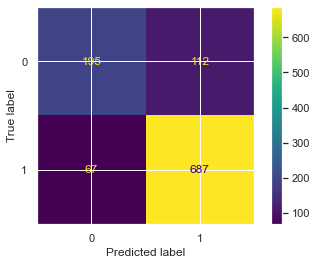

In [62]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train);
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



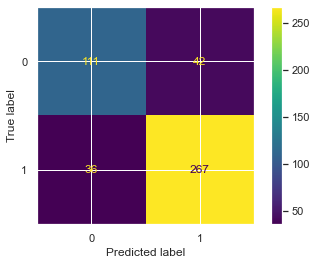

In [63]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

<b> LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [65]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)

0.8341187558906692


In [66]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)

0.8333333333333334


AUC: 0.8894


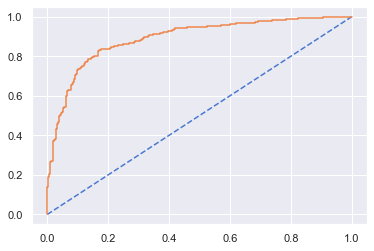

In [67]:
# predict probabilities
pred_prob_train = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
pred_prob_train = pred_prob_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, pred_prob_train)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8876


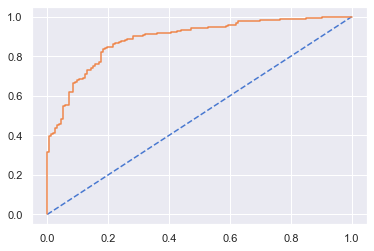

In [68]:
# predict probabilities
pred_prob_test = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_prob_test)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

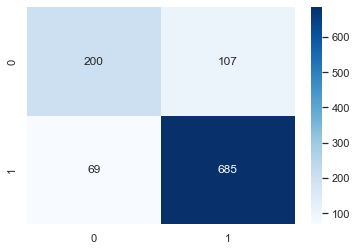

In [69]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

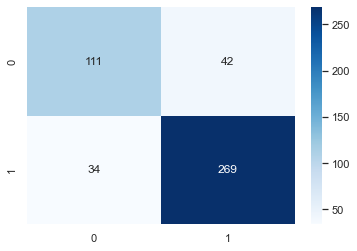

In [70]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [71]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [72]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



<b> LDA Altering threshold 

In [73]:
pred_prob_train[:]

array([0.05078353, 0.92175938, 0.69261127, ..., 0.77911156, 0.79161073,
       0.98113175])

In [74]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))

0.1 

Accuracy Score 0.7587
0.2 

Accuracy Score 0.7926
0.3 

Accuracy Score 0.8134
0.4 

Accuracy Score 0.8341
0.5 

Accuracy Score 0.8341
0.6 

Accuracy Score 0.8275
0.7 

Accuracy Score 0.8303
0.8 

Accuracy Score 0.7908
0.9 

Accuracy Score 0.6975


<b> Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [76]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [77]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)

0.8350612629594723


In [78]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)

0.8223684210526315


AUC: 0.8879


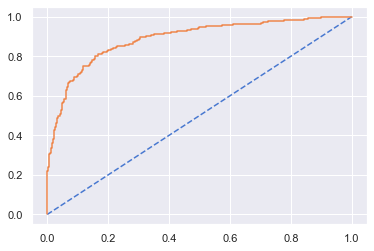

In [79]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8764


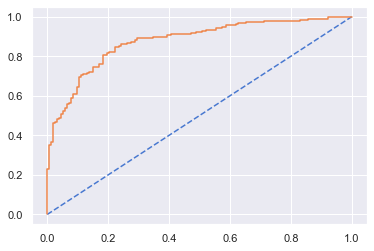

In [80]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

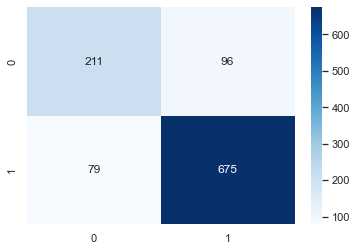

In [81]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

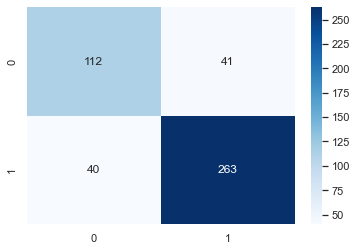

In [82]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [83]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [84]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



<b>KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)


0.8510838831291234


In [87]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)

0.8114035087719298


AUC: 0.9272


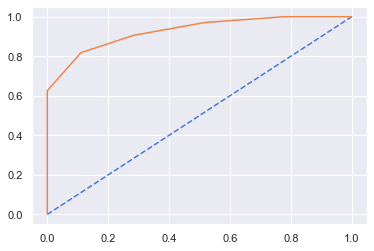

In [88]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8647


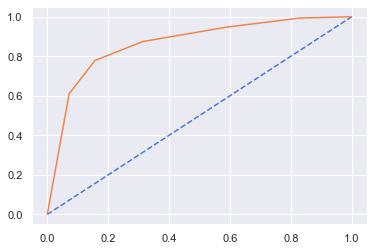

In [89]:
# predict probabilities
probs =KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

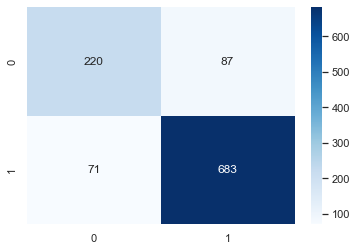

In [90]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

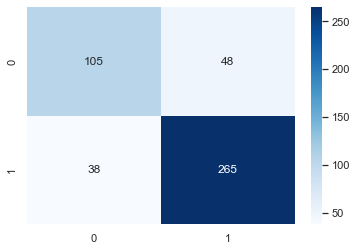

In [91]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [92]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [93]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       153
           1       0.85      0.87      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



<b> Finding the optimal K value

In [94]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,45,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22807017543859653,
 0.19517543859649122,
 0.1885964912280702,
 0.19517543859649122,
 0.17543859649122806,
 0.17105263157894735,
 0.18201754385964908,
 0.16666666666666663,
 0.16447368421052633,
 0.17105263157894735,
 0.17105263157894735,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735,
 0.17543859649122806,
 0.17324561403508776,
 0.16666666666666663,
 0.16228070175438591,
 0.16885964912280704,
 0.17324561403508776]

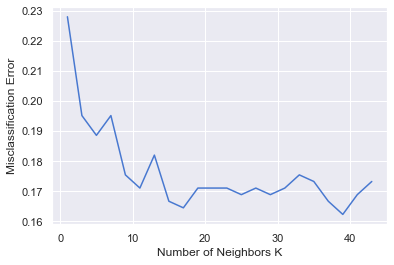

In [95]:
plt.plot(range(1,45,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 39 it is giving the best test accuracy

In [96]:
KNN_model=KNeighborsClassifier(n_neighbors=39)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [97]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)


0.824693685202639


In [98]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)

0.8377192982456141


AUC: 0.8972


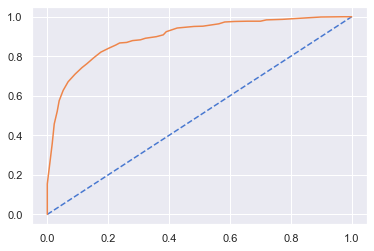

In [99]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8910


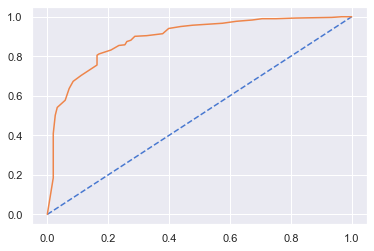

In [100]:
# predict probabilities
probs =KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

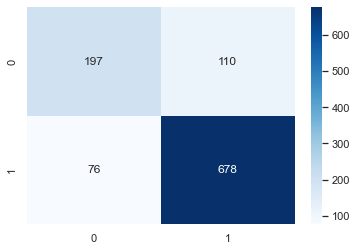

In [101]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

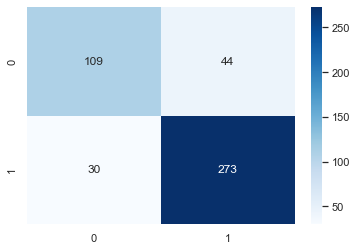

In [102]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [103]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       307
           1       0.86      0.90      0.88       754

    accuracy                           0.82      1061
   macro avg       0.79      0.77      0.78      1061
weighted avg       0.82      0.82      0.82      1061



In [104]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



<b> Here we can see that for k = 39, the model seems to perform better rather than k = 5 by default

<b> Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=Random_Forest,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [79]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)

0.9670122525918945


In [80]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)

0.8289473684210527


AUC: 0.9974


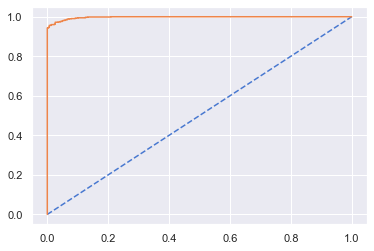

In [81]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8964


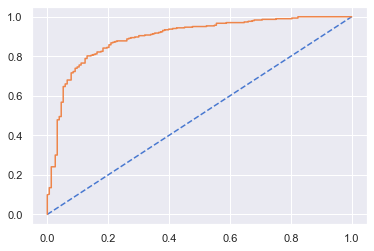

In [82]:
# predict probabilities
probs =Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

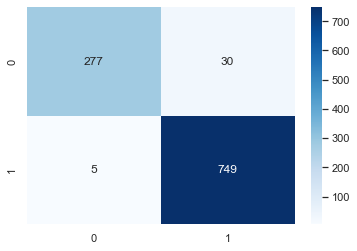

In [83]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

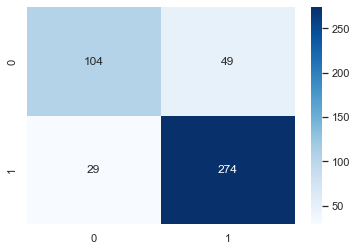

In [84]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [85]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [86]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



<b> Ada Boost

In [156]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [157]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)

0.8501413760603205


In [158]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)

0.8135964912280702


AUC: 0.9148


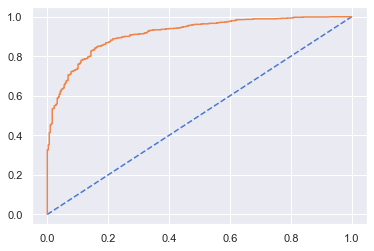

In [159]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8774


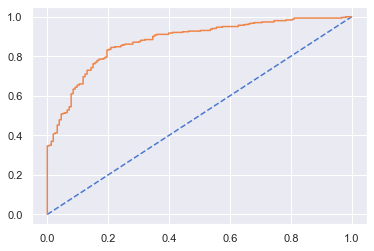

In [160]:
# predict probabilities
probs =ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

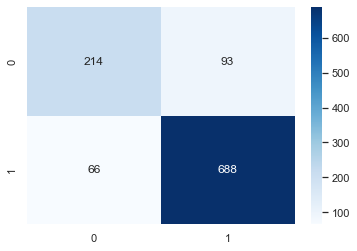

In [161]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

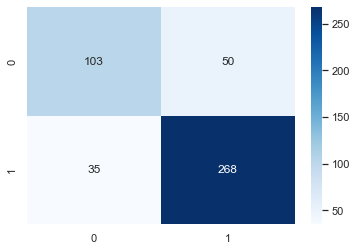

In [163]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [164]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [165]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



<b> Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [167]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)

0.8925541941564562


In [168]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)


0.8333333333333334


AUC: 0.9512


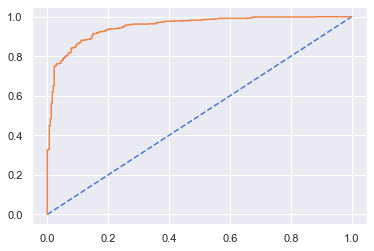

In [169]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8987


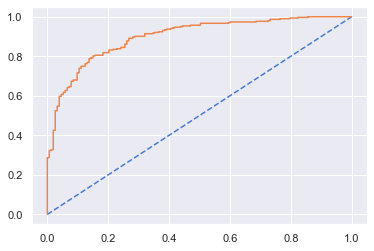

In [170]:
# predict probabilities
probs =gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

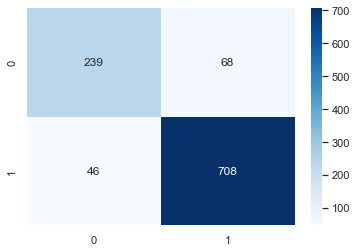

In [171]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

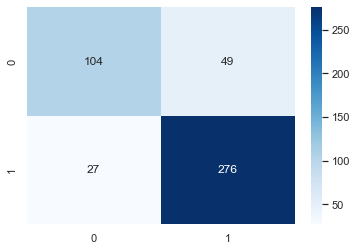

In [172]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [173]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [174]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



<b> Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [70]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)

1.0


In [71]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.8333333333333334


AUC: 1.0000


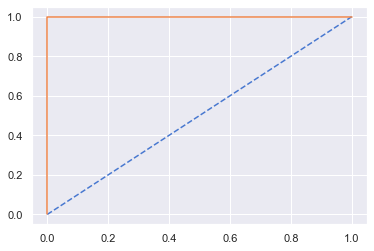

In [72]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8948


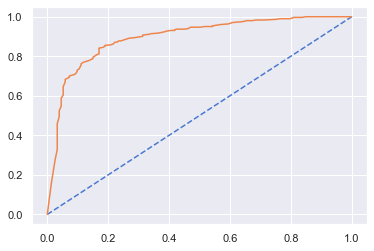

In [73]:
# predict probabilities
probs =RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

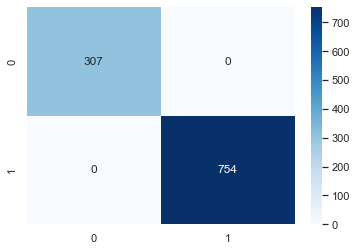

In [74]:
cm = confusion_matrix(y_train, y_train_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

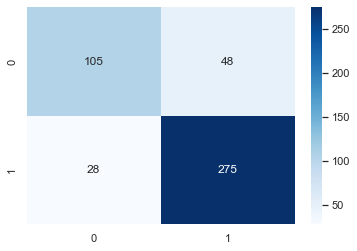

In [75]:
cm = confusion_matrix(y_test, y_test_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

In [76]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [77]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



<b> RF Model Tuning 

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [3,4,5],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [30,60,90],
    'n_estimators': [50,100,150]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [208]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 60, 90],
                         'n_estimators': [50, 100, 150]})

In [209]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

In [210]:
best_grid = grid_search.best_estimator_

In [211]:
best_grid

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=50, random_state=0)

In [212]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [213]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [214]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



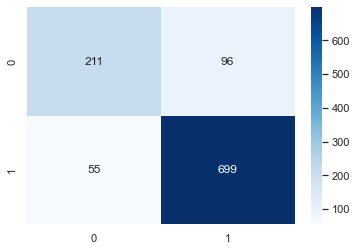

In [215]:
cm = confusion_matrix(y_train, ytrain_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

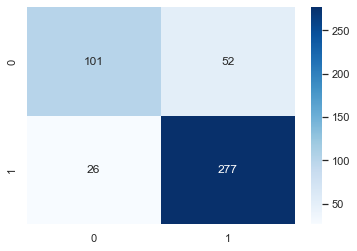

In [216]:
cm = confusion_matrix(y_test, ytest_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

AUC: 0.9248


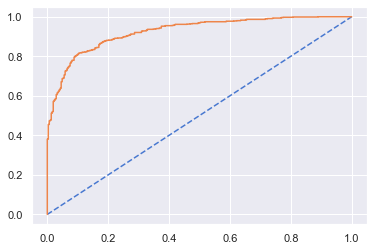

In [217]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8930


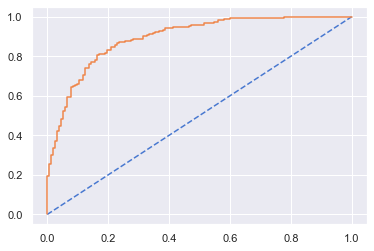

In [218]:
# predict probabilities
probs =best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curveaa
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

In [219]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,5],
    'min_samples_leaf': [20,30,40],
    'min_samples_split': [60,90,120],
    'n_estimators': [50,100,150]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [220]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [60, 90, 120],
                         'n_estimators': [50, 100, 150]})

In [221]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 100}

In [222]:
best_grid = grid_search.best_estimator_

In [223]:
best_grid

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=20,
                       min_samples_split=60, random_state=0)

In [224]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [225]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [226]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



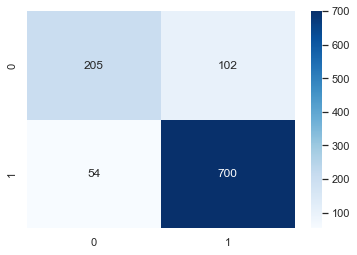

In [227]:
cm = confusion_matrix(y_train, ytrain_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

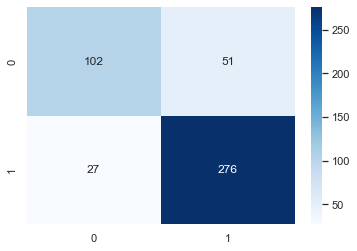

In [228]:
cm = confusion_matrix(y_test,ytest_predict);
sns.heatmap(cm,cmap='Blues',annot = True,fmt=".0f");

AUC: 0.9090


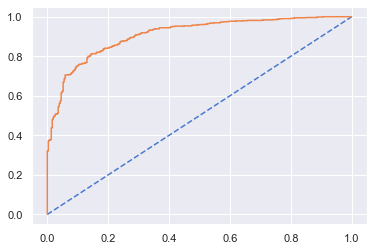

In [229]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

AUC: 0.8892


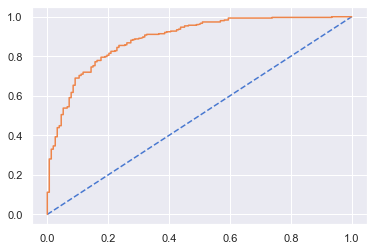

In [230]:
# predict probabilities
probs =best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curveaa
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the LDA_model
plt.plot(train_fpr, train_tpr);

# Question 2 Text Analytics

In [1]:
import nltk
import string
import re
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to C:\Users\Krithika
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [2]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [3]:
len(inaugural.fileids())

59

In [4]:
len(inaugural.raw('1941-Roosevelt.txt'))

7571

In [5]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [6]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [7]:
len(inaugural.raw('1961-Kennedy.txt'))

7618

In [8]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [9]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [10]:
len(inaugural.raw('1973-Nixon.txt'))

9991

In [11]:
len(inaugural.words('1973-Nixon.txt'))

2028

In [12]:
len(inaugural.sents('1973-Nixon.txt'))

69

In [13]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [14]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [15]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [116]:
nltk.download('stopwords')
nltk.download('punkt') #ability to take sentence structures &  break them down to individual components
#punkt allows us to do tokenization - takes a sentence and breaks them in to individual words 
#which allows the algorithm to understand that it has encountered a sequence of individual words 
#and stored in the same set.

[nltk_data] Downloading package stopwords to C:\Users\Krithika
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Krithika
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [118]:
stopwords.append("--")

In [119]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [122]:
#Storing the data as words in lower case in a variable 
all_words_roosevelt=[]
for w in inaugural.words(inaugural.fileids()[38]):
    words=w.lower() #convert to lower case
    all_words_roosevelt.append(words)
len(all_words_roosevelt)

1536

In [123]:
len(inaugural.words(inaugural.fileids()[38]))

1536

In [124]:
all_words_clean_roosevelt =[]
for word in all_words_roosevelt :
    if word not in stopwords:
        all_words_clean_roosevelt .append(word)
            
len(all_words_clean_roosevelt )

632

In [125]:
" ".join(all_words_clean_roosevelt)

'national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things

In [126]:
#Storing the data as words in lower case in a variable 
all_words_kennedy=[]
for w in inaugural.words(inaugural.fileids()[43]):
    words=w.lower() #convert to lower case
    all_words_kennedy.append(words)
len(all_words_kennedy)

1546

In [127]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [128]:
all_words_clean_kennedy=[]
for word in all_words_kennedy:
    if word not in stopwords:
        all_words_clean_kennedy.append(word)
            
len(all_words_clean_kennedy)

697

In [129]:
" ".join(all_words_clean_kennedy)

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

In [130]:
#Storing the data as words in lower case in a variable 
all_words_nixon=[]
for w in inaugural.words(inaugural.fileids()[46]):
    words=w.lower() #convert to lower case
    all_words_nixon.append(words)
len(all_words_nixon)

2028

In [131]:
all_words_clean_nixon=[]
for word in all_words_nixon:
    if word not in stopwords:
        all_words_clean_nixon.append(word)
            
len(all_words_clean_nixon)

836

In [132]:
" ".join(all_words_clean_nixon)

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

In [133]:
words_freq_clean_roosevelt = nltk.FreqDist(all_words_clean_roosevelt)
words_freq_clean_roosevelt

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [134]:
words_freq_clean_kennedy = nltk.FreqDist(all_words_clean_kennedy)
words_freq_clean_kennedy

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [135]:
words_freq_clean_nixon = nltk.FreqDist(all_words_clean_nixon)
words_freq_clean_nixon

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [136]:
!pip install wordcloud

In [137]:
from wordcloud import WordCloud,STOPWORDS

In [138]:
roosevelt_words = " ".join(all_words_clean_roosevelt)

In [139]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(roosevelt_words)

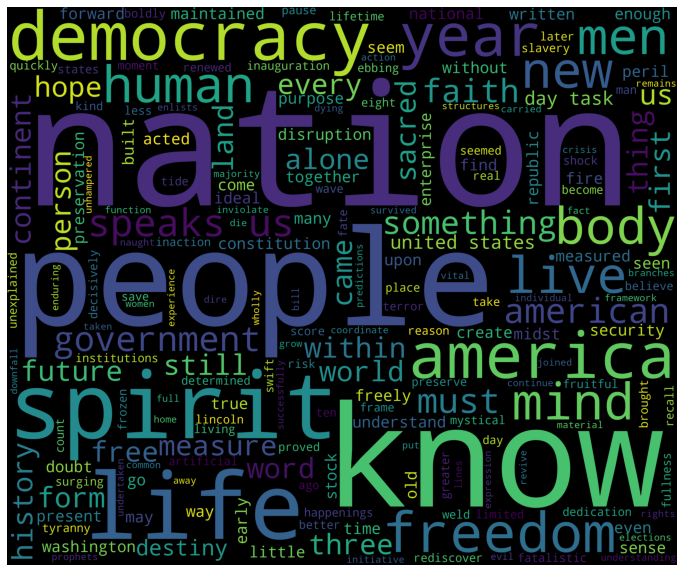

In [140]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [141]:
kennedy_words = " ".join(all_words_clean_kennedy)

In [142]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(kennedy_words)

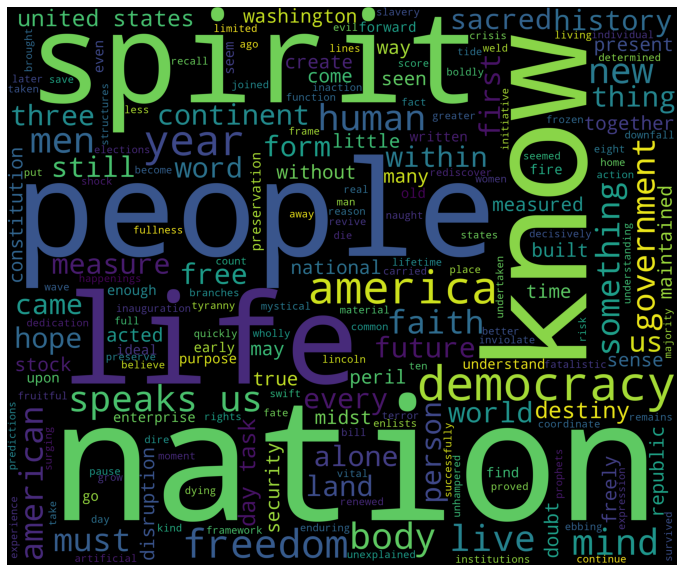

In [143]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [144]:
nixon_words = " ".join(all_words_clean_nixon)

In [145]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(nixon_words)

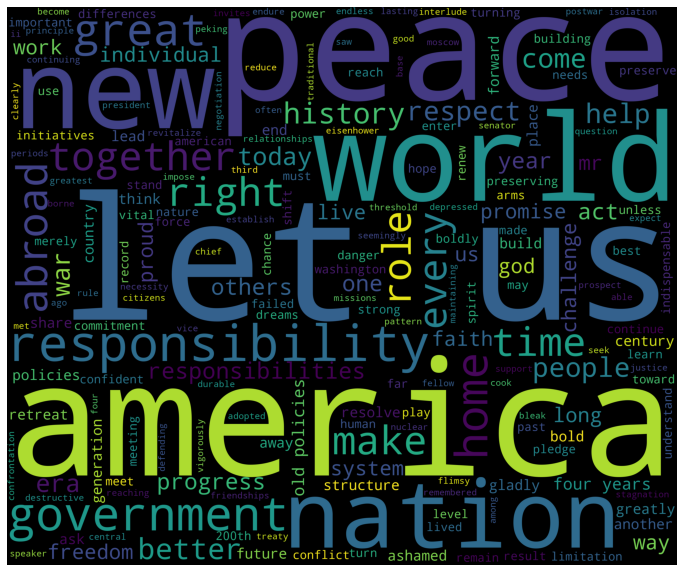

In [146]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()